<a href="https://colab.research.google.com/github/rizaho/ml_for_financial_analysis/blob/main/101_Time_Series_Analysis_And_Forecasting_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://ceb.udemy.com/course/time-series-analysis-and-forecasting-with-python/learn/lecture/27893330#overview


# ARIMA (Auto Regressive Integrated Moving Average)


## Auto Regressive:
In an autoregression model, we forecast the variable of interest using linear combination of past *values of the variable*.

* This is an Auto Regressive (AR) model of order **P**.
* P value states how much we want to go back in time to predict the X value in time t.

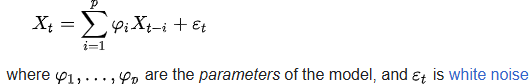

## Integrated


## Moving Average

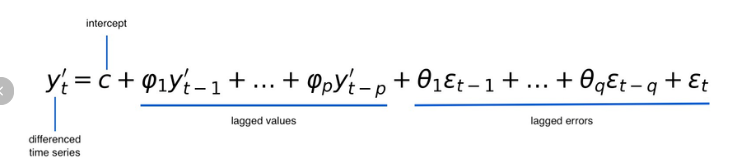